In [1]:
import main
import plot_inequality as plot_ineq
import time
import importlib
import io_manager
import numpy as np
importlib.reload(plot_ineq)
#run stuff here
start_time = time.perf_counter()
print("Running main")

of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
trans_path = main_path + "input/50p_age_moms/MH_trans_uncond_age.csv"
test_trans_path = main_path + "input/50p_age_moms/MH_trans_test_age.csv"
iid_trans_path = main_path + "input/50p_age_moms/MH_trans_test_iid.csv"
perm_trans_path = main_path + "input/50p_age_moms/MH_trans_test_perm.csv"
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"

do_dpi_calib = False
output_flag = False
myPars, myShocks, sols, sims = main.main_io(main_path, out_folder_name = of_name, H_trans_uncond_path = trans_path, 
                                            output_flag = output_flag, do_dpi_calib = do_dpi_calib)


Running main
*****Running main_io with default out_folder_name*****
Solver ran in 6.970881500001269 seconds
Calibrating with alpha_lab_targ = 0.33495033, w0_mean_targ = 2.1986368, w0_sd_targ = 0.29955208, 
                                        w1_targ = 0.2915730000000001, w2_targ = 0.2731836000000003, wH_targ = 0.051262233,
                                        dpi_BB_targ = 0.50886095, dpi_GG_targ = 0.34358001
***** Calibration iteration 0 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 1 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 2 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 3 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 4 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 5 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Cali

In [2]:
# from pars_shocks import Shocks
# import solver
# import simulate

# myPars.set_delta_pi_BB(0.0)
# myPars.set_delta_pi_GG(0.0)
# myShocks = Shocks(myPars)
# sols = solver.solve_lc(myPars)
# sims = simulate.sim_lc(myPars, myShocks, sols) 

In [3]:
# import my_toolbox as tb
# import calibration as calib
# importlib.reload(tb)
# H_hist = myShocks.H_hist[:,:,:,:myPars.J]
# H_hist_ac = tb.lagged_corr(H_hist, 10)
# print(H_hist_ac)
# H_hist_ac = tb.lagged_corr_jit(H_hist, 10)
# print(H_hist_ac)
# dpi_BB_mom = calib.dpi_BB_moment(myPars)
# dpi_GG_mom = calib.dpi_GG_moment(myPars)
# print(f"dpi_BB_mom = {dpi_BB_mom}")
# print(f"dpi_GG_mom = {dpi_GG_mom}")

In [4]:
import numpy as np
import pandas as pd

H_hist = myShocks.H_hist

# Assuming H_hist has shape (4, 2, 1000, 52) from previous context
# Flatten to 2D array (8000, 52)
reshaped_H_hist = H_hist.reshape(-1, H_hist.shape[-1])
print("reshaped_H_hist.shape", reshaped_H_hist.shape)

# Create an empty array with proper shape (8000 * 52 rows, 3 columns)
stata_form_arr = np.ones((reshaped_H_hist.shape[0] * reshaped_H_hist.shape[1], 3))
print("stata_form_arr.shape", stata_form_arr.shape)

# Populate the stata_form_arr correctly by iterating over rows and columns
row_counter = 0
for r in range(reshaped_H_hist.shape[0]):  # Loop over individuals
    for c in range(reshaped_H_hist.shape[1]):  # Loop over age (time steps)
        stata_form_arr[row_counter, 0] = r  # Individual ID
        stata_form_arr[row_counter, 1] = c  # Age (time step)
        stata_form_arr[row_counter, 2] = reshaped_H_hist[r, c]  # MH value
        row_counter += 1

# Convert to pandas DataFrame
stata_df = pd.DataFrame(stata_form_arr, columns=["individual", "age", "MH"])
# print(stata_df.head(10))
print("stata_df.shape", stata_df.shape)

# Calculate mean MH by age using pandas groupby
pd_mean_MH_by_age = stata_df.groupby("age").MH.mean()
# print("pd_mean_MH_by_age", pd_mean_MH_by_age)

# Calculate mean MH by age using numpy directly
np_mean_by_age = np.mean(reshaped_H_hist, axis=0)
# print("np_mean_by_age", np_mean_by_age)

# export pandas DataFrame to csv
# export_path = main_path + "output/sim_MH_stata_format.csv"
# stata_df.to_csv(export_path, index=False)


reshaped_H_hist.shape (20000, 52)
stata_form_arr.shape (1040000, 3)
stata_df.shape (1040000, 3)


In [5]:
import my_toolbox as tb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

input_path = main_path + "input/50p_age_moms/"
# autocorr_input_path = main_path + "autocorr_matrix.csv"
autocorr_input_path = main_path + "autocorr_matrix_indiv_lag.csv"

# read in csv to pandas
autocorr_pd = pd.read_csv(input_path + "autocorr_matrix.csv")
# print(autocorr_pd.head())


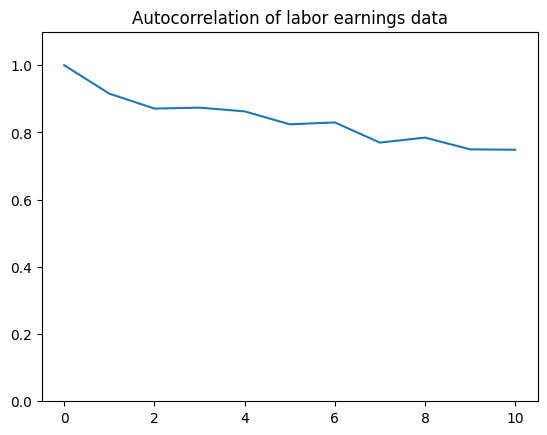

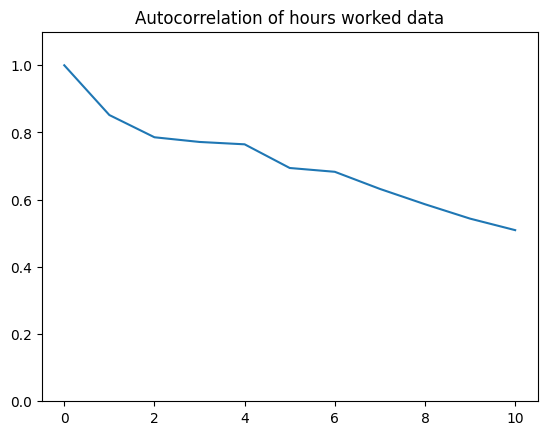

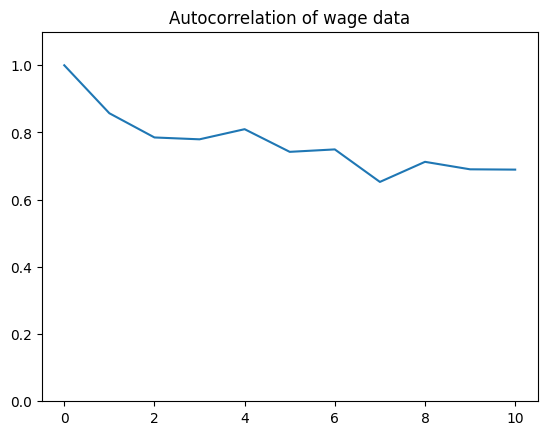

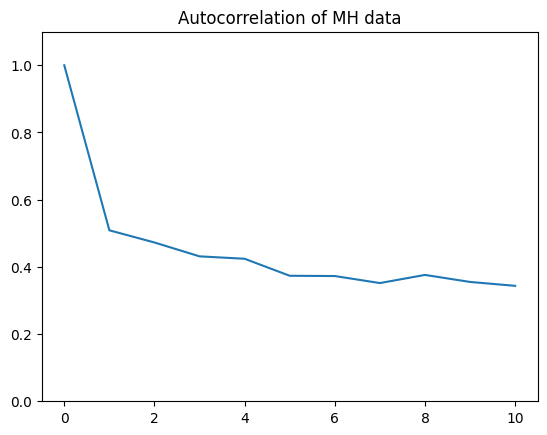

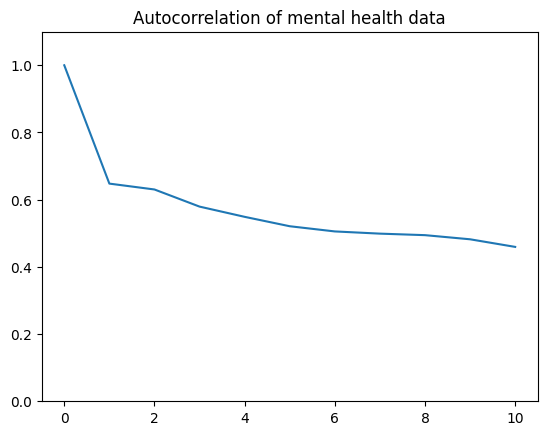

In [6]:
autocorr_y_lim = [0, 1.1]
from typing import Tuple

def plot_autocorr(autocorr_data: np.ndarray, var_name: str = None, y_lim: list = [0, 1.1], quietly: bool = False)-> Tuple[plt.Figure, plt.Axes]:
    fig_data, ax_data = plt.subplots()
    ax_data.plot(autocorr_data)
    ax_data.set_title(f"Autocorrelation of {var_name}")
    ax_data.set_ylim(y_lim)
    if not quietly:
        plt.show()
    return fig_data, ax_data

quietly = True

lab_earn_autocorr = autocorr_pd["labor_earnings"].values
fig_data_earn, ax_data_earn = plot_autocorr(lab_earn_autocorr, "labor earnings data", autocorr_y_lim, quietly = quietly)
hours_autocorr = autocorr_pd["job_hours"].values
fig_data_hours, ax_data_hours = plot_autocorr(hours_autocorr, "hours worked data", autocorr_y_lim, quietly = quietly)
wage_autocorr = autocorr_pd["wage"].values
fig_data_wage, ax_data_wage = plot_autocorr(wage_autocorr, "wage data", autocorr_y_lim)
MH_autocorr = autocorr_pd["MH"].values
fig_data_MH, ax_data_MH = plot_autocorr(MH_autocorr, "MH data", autocorr_y_lim, quietly = quietly)
mental_health_autocorr = autocorr_pd["mental_health"].values
fig_data_menal_health, ax_data_mental_health = plot_autocorr(mental_health_autocorr, "mental health data", 
                                                             autocorr_y_lim, quietly = quietly)

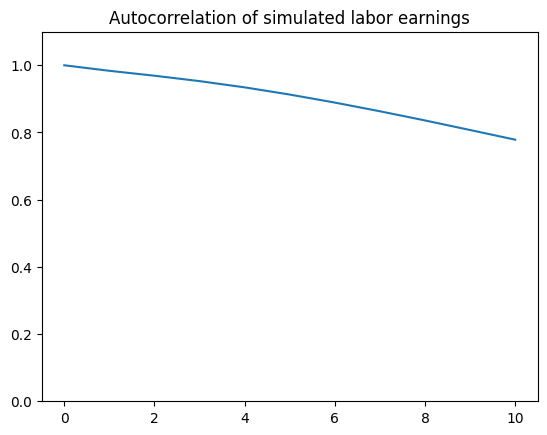

sim_lab_earn_ac [1.         0.98357779 0.96892129 0.95285698 0.93428618 0.9128787
 0.88899496 0.86313772 0.83583959 0.80733357 0.77853571]


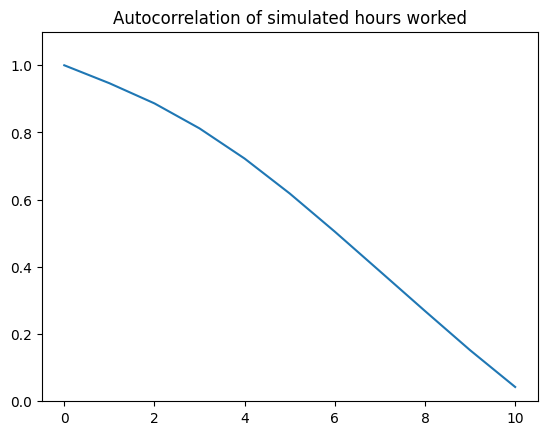

sim_hours_ac [1.         0.9466484  0.88656365 0.81209608 0.72232328 0.61840976
 0.5048317  0.38692697 0.26867372 0.15206017 0.04255807]


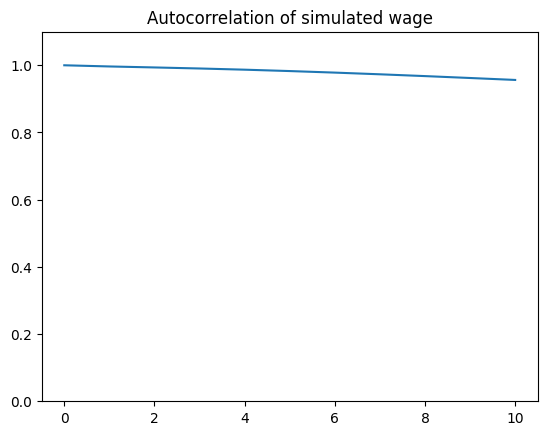

sim_wage_ac [1.         0.99648988 0.99355624 0.99044674 0.98688827 0.98278342
 0.9781813  0.97315415 0.96779493 0.96213834 0.9563587 ]


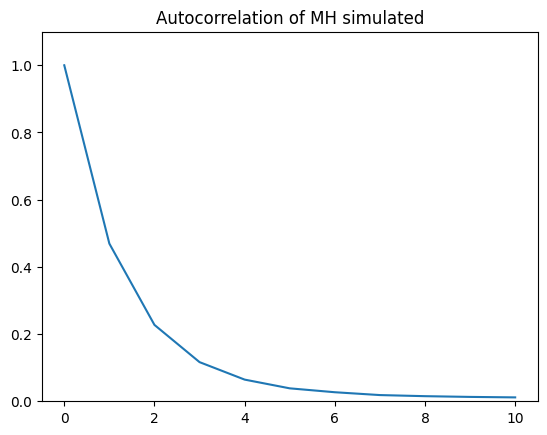

H_hist_ac [1.         0.46923042 0.22733852 0.11650749 0.06451402 0.03850876
 0.02690984 0.01846906 0.01518508 0.01300544 0.01157761]


In [7]:
sim_lab_earn = sims["lab_earnings"][:, :, :, :-1]
sim_lab_earn_ac = tb.lagged_corr(sim_lab_earn, max_lag=10)
fig_sim_earn, ax_sim_earn = plot_autocorr(sim_lab_earn_ac, "simulated labor earnings", autocorr_y_lim)
print("sim_lab_earn_ac", sim_lab_earn_ac)

sim_hours = sims["lab"][:, :, :, :-1]
sim_hours_ac = tb.lagged_corr(sim_hours, max_lag=10)
fig_sim_hours, ax_sim_hours = plot_autocorr(sim_hours_ac, "simulated hours worked", autocorr_y_lim)
print("sim_hours_ac", sim_hours_ac)

sim_wage = sims["wage"][:, :, :, :-1]
sim_wage_ac = tb.lagged_corr(sim_wage, max_lag=10)
fig_sim_wage, ax_sim_wage = plot_autocorr(sim_wage_ac, "simulated wage", autocorr_y_lim)
print("sim_wage_ac", sim_wage_ac)
# mean_wage_by_age = np.mean(sim_wage, axis=tuple(range(sim_wage.ndim - 1))) 
# print("mean_wage_by_age", mean_wage_by_age)

H_hist = myShocks.H_hist[:, :, :, :-1]
H_hist_ac = tb.lagged_corr(H_hist, max_lag=10)
fig_sim_H_ac, ax_sim_H_ac = plot_autocorr(H_hist_ac, "MH simulated", autocorr_y_lim)
print("H_hist_ac", H_hist_ac)


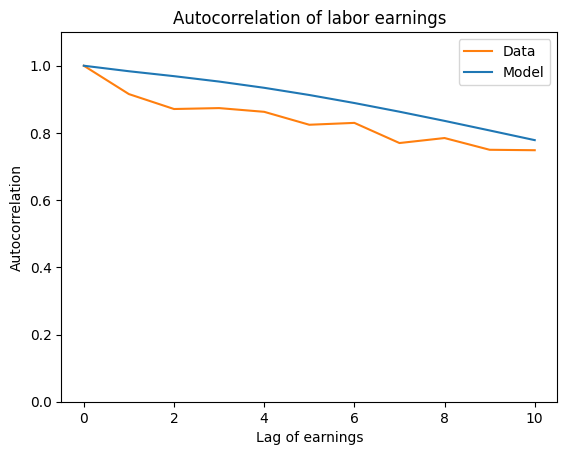

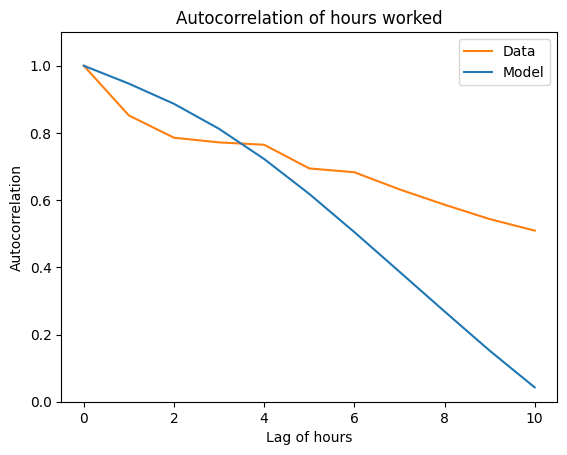

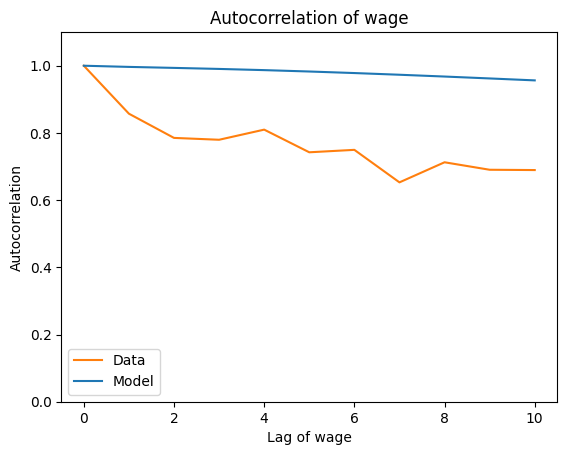

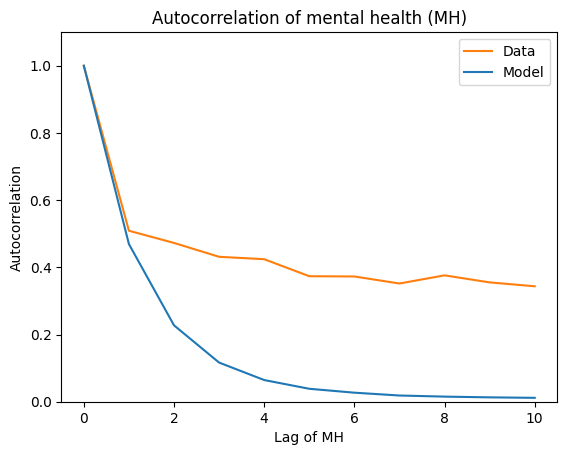

In [8]:
importlib.reload(tb)

corr_save_path = main_path + "output/autocorr_figs/"

comb_fig_title_prefix = "Autocorrelation of "
# comb_fig_title_suffix = " in the data and the model"
comb_fig_title_suffix = ""

label_lists = [["Data"], ["Model"]]
color_list = ["C1", "C0"]
x_label = "Lag"
y_label = "Autocorrelation"


fig_comb_earn_autocorr, ax_comb_earn_autocorr = tb.combine_plots([(fig_data_earn, ax_data_earn), (fig_sim_earn, ax_sim_earn)], 
                                                                 comb_fig_title = comb_fig_title_prefix + "labor earnings" + comb_fig_title_suffix, 
                                                                 x_label = x_label + " of earnings", y_label = y_label,
                                                                 label_lists = label_lists, colors= color_list, save_path = corr_save_path + "autocorr_lab_earnings.pdf")

fig_comb_hours_autocorr, ax_comb_hours_autocorr = tb.combine_plots([(fig_data_hours, ax_data_hours), (fig_sim_hours, ax_sim_hours)],
                                                                     comb_fig_title = comb_fig_title_prefix + "hours worked" + comb_fig_title_suffix, 
                                                                     x_label = x_label + " of hours", y_label = y_label,
                                                                     label_lists = label_lists, colors= color_list, save_path = corr_save_path + "autocorr_hours_worked.pdf")

fig_comb_wage_autocorr, ax_comb_wage_autocorr = tb.combine_plots([(fig_data_wage, ax_data_wage), (fig_sim_wage, ax_sim_wage)],
                                                                    comb_fig_title = comb_fig_title_prefix + "wage" + comb_fig_title_suffix, 
                                                                    x_label = x_label + " of wage", y_label = y_label,
                                                                    label_lists = label_lists, colors= color_list, save_path = corr_save_path + "autocorr_wage.pdf")

fig_comb_MH_autocorr, ax_comb_MH_autocorr = tb.combine_plots([(fig_data_MH, ax_data_MH), (fig_sim_H_ac, ax_sim_H_ac)],
                                                                comb_fig_title = comb_fig_title_prefix + "mental health (MH)" + comb_fig_title_suffix, 
                                                                x_label = x_label + " of MH", y_label = y_label,
                                                                label_lists = label_lists, colors= color_list, save_path = corr_save_path + "autocorr_MH.pdf")

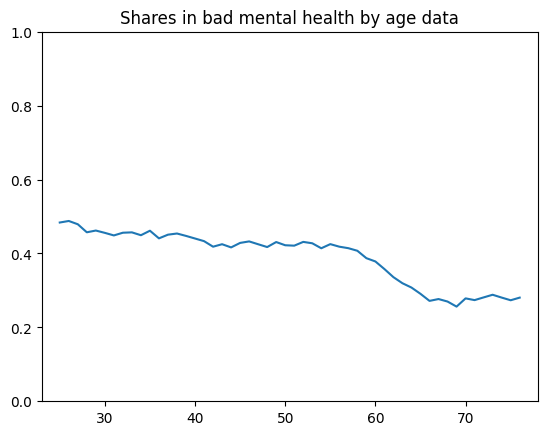

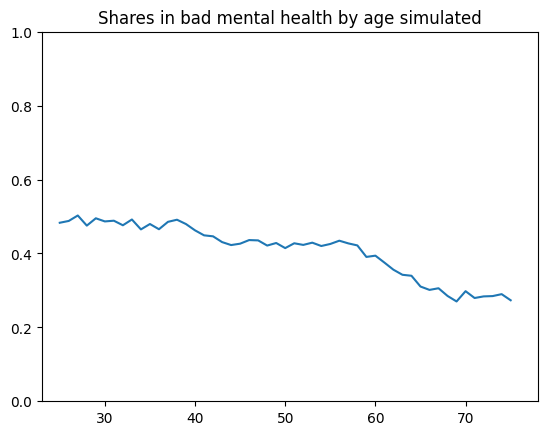

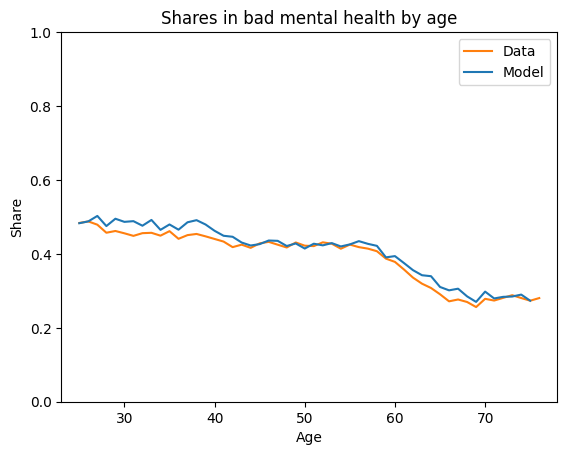

In [9]:
import model_uncert as model

# trans_path_uncond = main_path + "input/50p_age_moms/MH_trans_uncond_age.csv"
# myPars.H_trans = io_manager.read_and_shape_H_trans_uncond_age(myPars, trans_path_uncond)

# H_hist = myShocks.H_hist[:, :, :, :-1]
# H_hist_ac = lagged_corr(H_hist, max_lag=10)
# fig_sim_H_ac, ax_sim_H_ac = plot_autocorr(H_hist_ac, "MH simulated", autocorr_y_lim)
# # print("H_hist_ac", H_hist_ac)

shares_y_lim = [0, 1.0]
# shares in bad health by earnings (maybe later by wage, hours, etc)
age_grid = myPars.age_grid
bad_MH_age_data = pd.read_csv(input_path + "mean_bad_MH_by_age.csv")
# get second column as numpy array
bad_MH_age_data = bad_MH_age_data.to_numpy()[:,1:]
# plot shares in bad health by earnings
fig_bad_MH_data, ax_bad_MH_data = plt.subplots()
ax_bad_MH_data.plot(age_grid, bad_MH_age_data)
ax_bad_MH_data.set_title("Shares in bad mental health by age data")
ax_bad_MH_data.set_xlim([age_grid[0]-2, age_grid[-1]+2])    
ax_bad_MH_data.set_ylim(shares_y_lim)
plt.show()

# model shares in bad health by age
weighted_H_hist = model.gen_weighted_sim(myPars, H_hist) 
good_MH_age_sim = np.sum(weighted_H_hist, tuple(range(H_hist.ndim - 1)))
bad_MH_age_sim = 1 - good_MH_age_sim
# print("good_MH_age_sim", good_MH_age_sim)
# print("bad_MH_age_sim", bad_MH_age_sim)
fig_bad_MH_sim, ax_bad_MH_sim = plt.subplots()
ax_bad_MH_sim.plot(age_grid[:-1], bad_MH_age_sim)
ax_bad_MH_sim.set_title("Shares in bad mental health by age simulated")
ax_bad_MH_sim.set_xlim([age_grid[0]-2, age_grid[-1]+2])
ax_bad_MH_sim.set_ylim(shares_y_lim)
plt.show()

fig_comb_bad_MH, ax_comb_bad_MH = tb.combine_plots([(fig_bad_MH_data, ax_bad_MH_data), (fig_bad_MH_sim, ax_bad_MH_sim)],
                                                    comb_fig_title = "Shares in bad mental health by age", x_label = "Age", y_label = "Share", 
                                                    label_lists = label_lists, colors= color_list, save_path = corr_save_path + "shares_bad_MH.pdf")

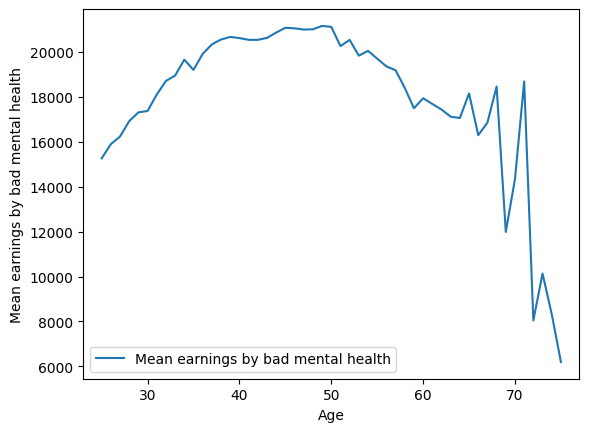

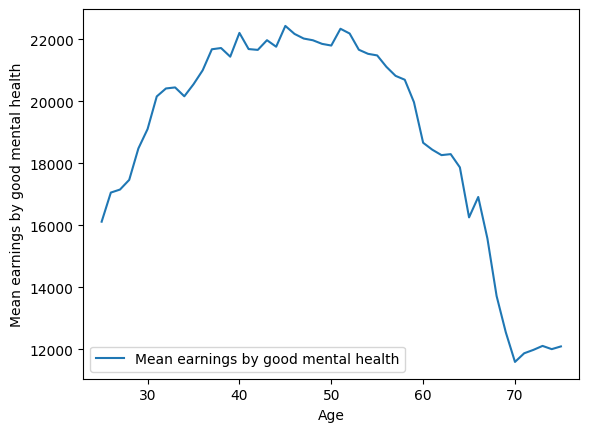

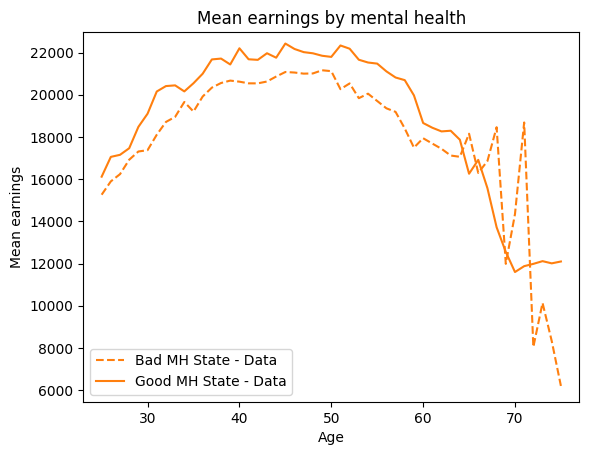

In [10]:
#  Mean earnings by health types/states
# -states first? model and data.
importlib.reload(tb)
shares_y_lim = [0, 1.0]
label_lists = [["Bad MH State - Data"], ["Good MH State - Data"]]
color_list = ["C1"]
linestyles = ["--", "-"]
age_grid = myPars.age_grid
earnings_data_pd : pd.DataFrame = pd.read_csv(input_path + "mean_earnings_by_health_age.csv") 
# drop last column
earnings_data_pd = earnings_data_pd.iloc[:, :-1]
# rename columns
earnings_data_pd.columns = ["age", "bad_MH", "good_MH"]
earnings_bad_MH_data = earnings_data_pd["bad_MH"].values * 12
earnings_good_MH_data = earnings_data_pd["good_MH"].values * 12
# plot
fig_earn_bad_MH_data, ax_earn_bad_MH_data = tb.plot_lc_mom_by_age(earnings_bad_MH_data, age_grid, "Mean earnings by bad mental health") 
fig_earn_good_MH_data, ax_earn_good_MH_data = tb.plot_lc_mom_by_age(earnings_good_MH_data, age_grid, "Mean earnings by good mental health")
                                                                        
# combine 
fig_comb_earns_by_MH_data, ax_comb_earns_by_MH_data = tb.combine_plots([(fig_earn_bad_MH_data, ax_earn_bad_MH_data), (fig_earn_good_MH_data, ax_earn_good_MH_data)],
                                                                comb_fig_title = "Mean earnings by mental health", x_label = "Age", y_label = "Mean earnings",
                                                                label_lists = label_lists, colors= color_list, linestyles = linestyles,
                                                                save_path = corr_save_path + "mean_earnings_by_MH.pdf")

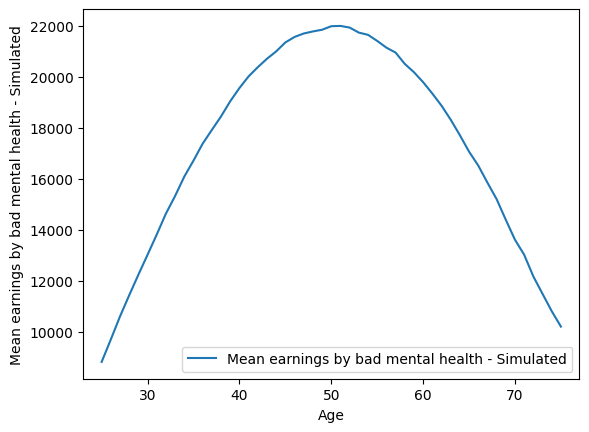

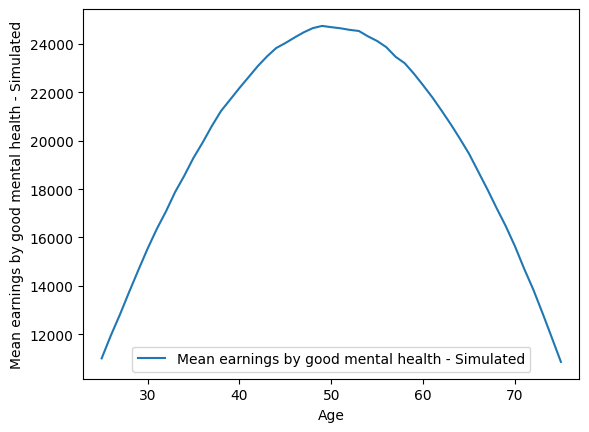

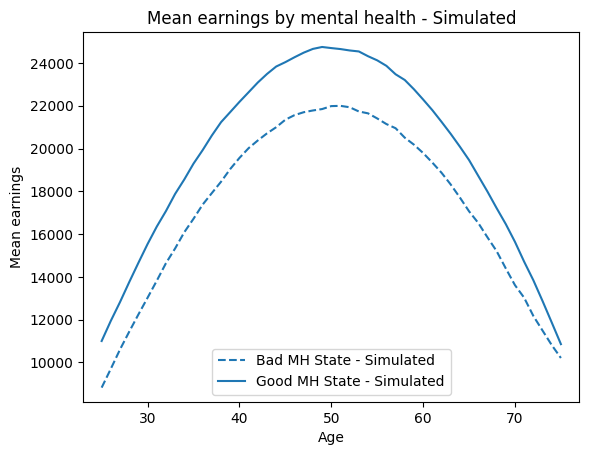

In [11]:
# model
H_hist: np.ndarray = myShocks.H_hist[:, :, :, :myPars.J]
lab_earnings_trim = sims["lab_earnings"][:, :, :, :myPars.J]

good_earnings = lab_earnings_trim * (H_hist == 1) 
bad_earnings = lab_earnings_trim * (H_hist == 0)

# Apply weights to the good_earnings matrix
good_earnings_weighted = good_earnings * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis]
good_earnings_weighted *= myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis]
# Mask zero values with NaN so they are ignored
good_earnings_masked = np.where(good_earnings_weighted != 0, good_earnings_weighted, np.nan)
# Compute the sum of valid weighted earnings (ignoring NaN) along all axes except the last one
sum_good_earnings = np.nansum(good_earnings_masked, axis=tuple(range(good_earnings.ndim - 1)))
# Create a mask of non-zero entries in good_earnings_weighted
non_zero_mask = (good_earnings_weighted != 0)
# Apply the same weights to the mask to get the total weight sum where the earnings were non-zero
total_weights = np.sum(non_zero_mask * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis] * myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis],
                        axis=tuple(range(good_earnings.ndim - 1)))
# Calculate the mean where non-zero entries exist
mean_good_earnings_by_age = np.divide(sum_good_earnings, total_weights, where=total_weights != 0)

# Apply weights to the bad_earnings matrix
bad_earnings_weighted = bad_earnings * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis]
bad_earnings_weighted *= myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis]
# Mask zero values with NaN so they are ignored
bad_earnings_masked = np.where(bad_earnings_weighted != 0, bad_earnings_weighted, np.nan)
# Compute the sum of valid weighted earnings (ignoring NaN) along all axes except the last one
sum_bad_earnings = np.nansum(bad_earnings_masked, axis=tuple(range(bad_earnings.ndim - 1)))
# Create a mask of non-zero entries in bad_earnings_weighted
non_zero_mask = (bad_earnings_weighted != 0)
# Apply the same weights to the mask to get the total weight sum where the earnings were non-zero
total_weights = np.sum(non_zero_mask * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis] *
                       myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis], axis=tuple(range(bad_earnings.ndim - 1)))
# Calculate the mean where non-zero entries exist
mean_bad_earnings_by_age = np.divide(sum_bad_earnings, total_weights, where=total_weights != 0)

# plot
shares_y_lim = [0, 1.0]
label_lists = [["Bad MH State - Simulated"], ["Good MH State - Simulated"]]
color_list = ["C0"]
linestyles = ["--", "-"]
age_grid = myPars.age_grid

mean_bad_earnings_by_age = mean_bad_earnings_by_age * 12
mean_good_earnings_by_age = mean_good_earnings_by_age * 12

fig_earn_bad_MH_sim, ax_earn_bad_MH_sim = tb.plot_lc_mom_by_age(mean_bad_earnings_by_age, age_grid, "Mean earnings by bad mental health - Simulated")
fig_earn_good_MH_sim, ax_earn_good_MH_sim = tb.plot_lc_mom_by_age(mean_good_earnings_by_age, age_grid, "Mean earnings by good mental health - Simulated")

# combine
fig_comb_earns_by_MH_sim, ax_comb_earns_by_MH_sim = tb.combine_plots([(fig_earn_bad_MH_sim, ax_earn_bad_MH_sim), (fig_earn_good_MH_sim, ax_earn_good_MH_sim)],
                                                                comb_fig_title = "Mean earnings by mental health - Simulated", x_label = "Age", y_label = "Mean earnings",
                                                                label_lists = label_lists, colors= color_list, linestyles = linestyles,
                                                                save_path = corr_save_path + "mean_earnings_by_MH_sim.pdf")

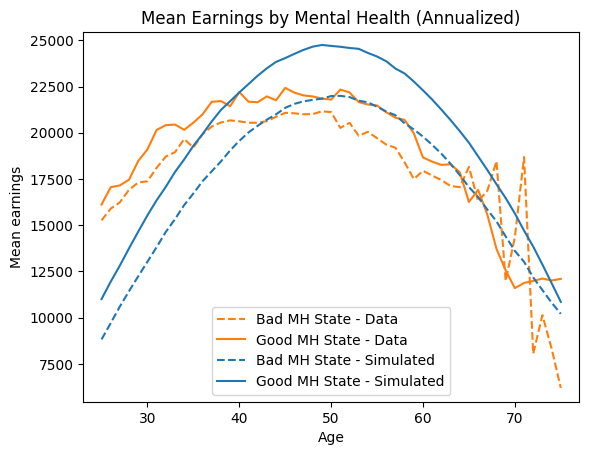

In [17]:
# combine the sim and data plots
fig_comb_earns_by_MH, ax_comb_earns_by_MH = tb.combine_plots([(fig_earn_bad_MH_data, ax_earn_bad_MH_data), (fig_earn_good_MH_data, ax_earn_good_MH_data),
                                                             (fig_earn_bad_MH_sim, ax_earn_bad_MH_sim), (fig_earn_good_MH_sim, ax_earn_good_MH_sim)],
                                                             comb_fig_title = "Mean Earnings by Mental Health (Annualized)", x_label = "Age", y_label = "Mean earnings",
                                                             label_lists = [["Bad MH State - Data"], ["Good MH State - Data"], ["Bad MH State - Simulated"], ["Good MH State - Simulated"]],
                                                             colors= ["C1", "C1", "C0", "C0"], linestyles = ["--", "-", "--", "-"],
                                                             save_path = corr_save_path + "mean_earnings_by_MH_comb.pdf")

   age  job_hours_decimal  sd_job_hours_decimal  log_hours  sd_log_hours
0   25           0.347936              0.084337   3.509008      0.310979
1   26           0.348855              0.082552   3.514179      0.299783
2   27           0.348197              0.084685   3.511158      0.303134
3   28           0.345752              0.085287   3.503169      0.306298
4   29           0.343747              0.089443   3.493511      0.319371
   age       wage   sd_wage  log_wage  sd_log_wage
0   25   9.454227  3.202393  2.198637     0.299552
1   26   9.918683  4.360361  2.237093     0.315548
2   27   9.963718  3.575214  2.246427     0.314495
3   28  10.319913  3.835456  2.279448     0.318563
4   29  10.797678  4.385821  2.315715     0.342803


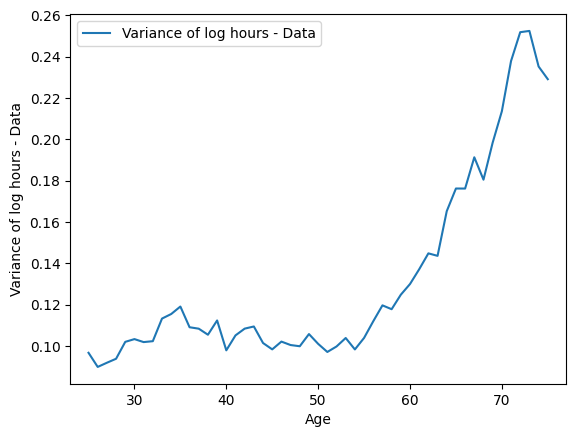

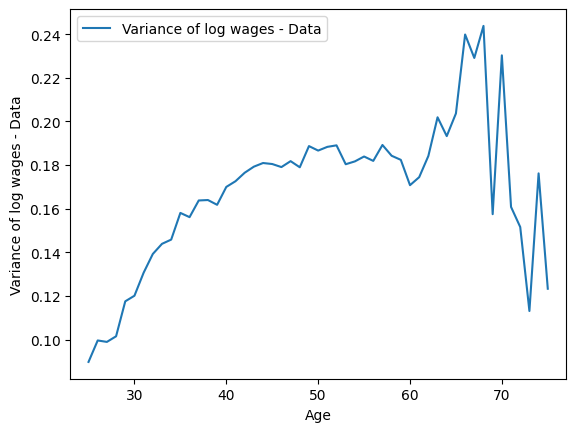

In [13]:
# Variance of log hours and log wages in the data
hours_data = pd.read_csv(input_path +  "labor_moments.csv")
print(hours_data.head())
wages_data = pd.read_csv(input_path + "wage_moments.csv")
print(wages_data.head())

hours_var_data = hours_data["sd_log_hours"].values**2
wages_var_data = wages_data["sd_log_wage"].values**2

# plot
fig_hours_var_data, ax_hours_var_data = tb.plot_lc_mom_by_age(hours_var_data, age_grid, "Variance of log hours - Data")
fig_wages_var_data, ax_wages_var_data = tb.plot_lc_mom_by_age(wages_var_data, age_grid, "Variance of log wages - Data")


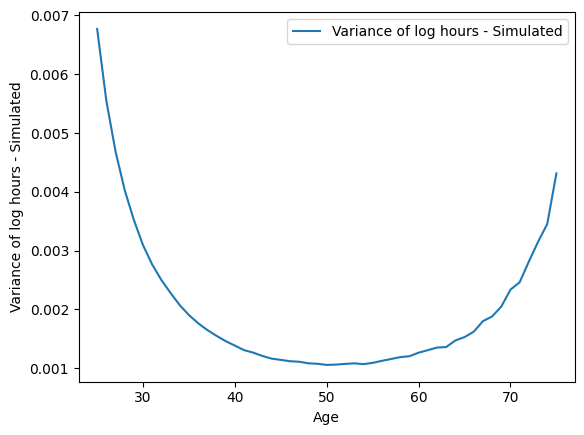

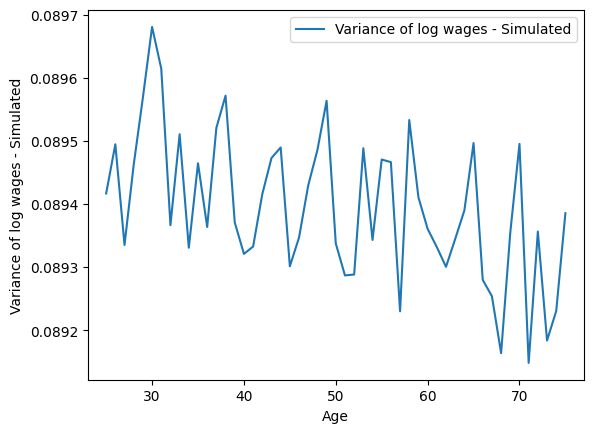

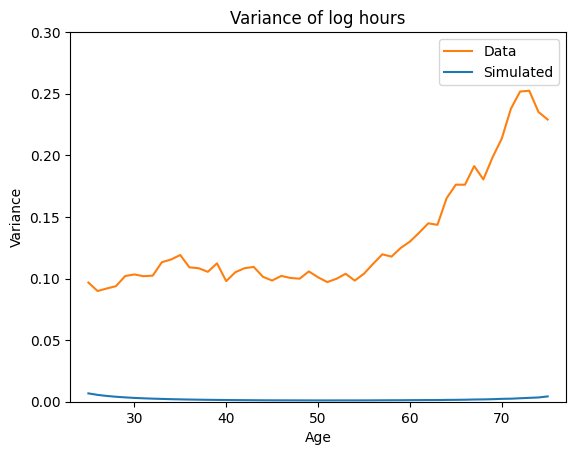

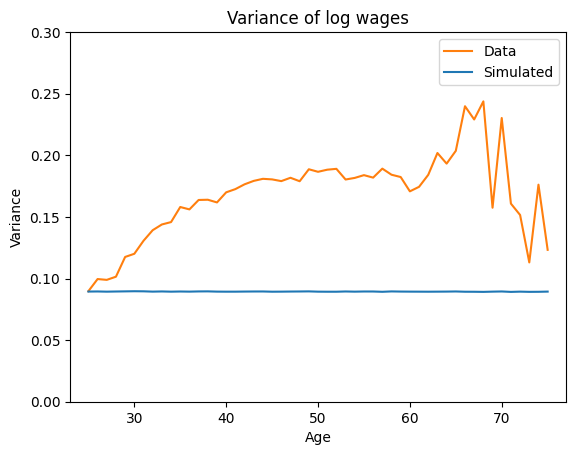

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Variance of log wages'}, xlabel='Age', ylabel='Variance'>)

In [14]:
# log sim hours where greater than 0
importlib.reload(plot_ineq)
sim_hours = sims["lab"][:, :, :, :myPars.J]*100

save_path = corr_save_path + "var_log_hours_sim.pdf"
fig_var_log_hours_sim, ax_var_log_hours_sim = plot_ineq.plot_var_log_sim(myPars, sim_hours, "Variance of log hours - Simulated", outpath = save_path, full_age_grid = True)

sim_wages = model.gen_wage_hist(myPars, myShocks)
save_path = corr_save_path + "var_log_wages_sim.pdf"
fig_var_log_wages_sim, ax_var_log_wages_sim = plot_ineq.plot_var_log_sim(myPars, sim_wages, "Variance of log wages - Simulated", outpath = save_path, full_age_grid = True)

# H_hist = myShocks.H_hist[:, :, :, :myPars.J]
# fig_var_MH_sim, ax_var_MH_sim = plot_ineq.plot_var_log_sim(myPars, H_hist, "Variance of MH - Simulated", full_age_grid = True)

# make two combination plots
y_lim = [0, 0.3]
tb.combine_plots([(fig_hours_var_data, ax_hours_var_data), (fig_var_log_hours_sim, ax_var_log_hours_sim)], y_lim = y_lim,
                    comb_fig_title = "Variance of log hours", x_label = "Age", y_label = "Variance", label_lists = [["Data"], ["Simulated"]],
                    colors = ["C1", "C0"], save_path = corr_save_path + "var_log_hours.pdf")

tb.combine_plots([(fig_wages_var_data, ax_wages_var_data), (fig_var_log_wages_sim, ax_var_log_wages_sim)], y_lim = y_lim,
                    comb_fig_title = "Variance of log wages", x_label = "Age", y_label = "Variance", label_lists = [["Data"], ["Simulated"]],
                    colors = ["C1", "C0"], save_path = corr_save_path + "var_log_wages.pdf")



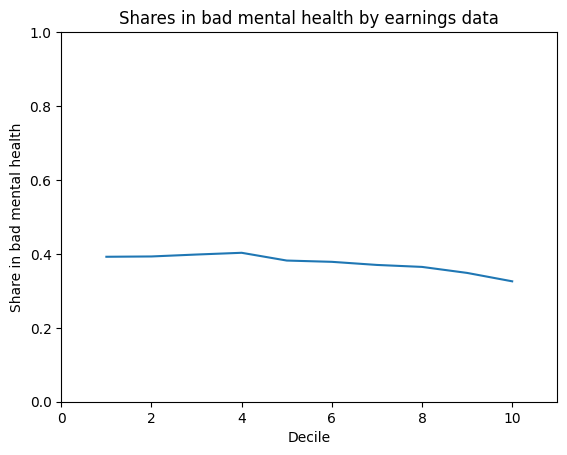

In [15]:
bad_MH_earn_data = pd.read_csv(input_path + "mean_bad_MH_by_earnings.csv")
decile_x_grid = np.arange(1, 11)
# get second column as numpy array
bad_MH_earn_data = bad_MH_earn_data.to_numpy()[:,1:]
# plot shares in bad health by earnings
fig_bad_MH_earn_data, ax_bad_MH_earn_data = plt.subplots()
ax_bad_MH_earn_data.plot(decile_x_grid, bad_MH_earn_data)
ax_bad_MH_earn_data.set_title("Shares in bad mental health by earnings data")
ax_bad_MH_earn_data.set_xlim([decile_x_grid[0]-1, decile_x_grid[-1]+1])
ax_bad_MH_earn_data.set_ylim(shares_y_lim)
ax_bad_MH_earn_data.set_xlabel("Decile")
ax_bad_MH_earn_data.set_ylabel("Share in bad mental health")
plt.show()

Earnings deciles: [ 366.90248944  939.85034098 1188.77612911 1465.46846983 1733.78002342
 1995.04174702 2295.61248276 2634.50863766 3024.65335633 3565.93796683
 4627.1976245 ]
Share of individuals in good health by earnings decile: [0.48386275 0.5982451  0.53502872 0.53974588 0.5952549  0.61852941
 0.59711765 0.59190196 0.61362745 0.74712745]
Share of individuals in bad health by earnings decile: [0.51613725 0.4017549  0.46497128 0.46025412 0.4047451  0.38147059
 0.40288235 0.40809804 0.38637255 0.25287255]


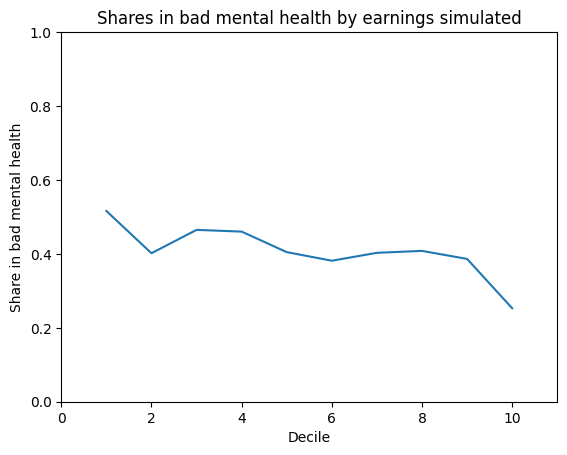

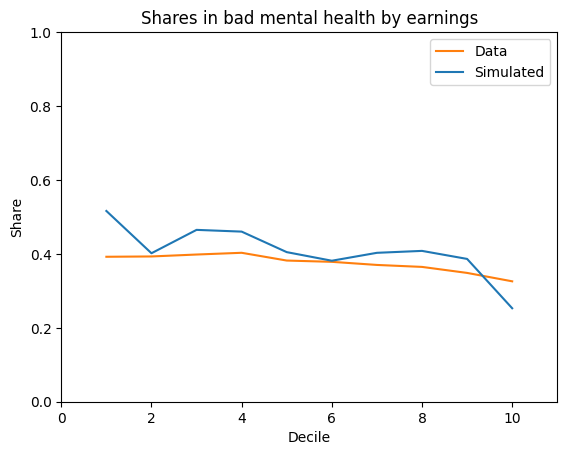

In [16]:
import numpy as np

# Step 1: Extract health and earnings histories
H_hist = myShocks.H_hist[:, :, :, :myPars.J]
earnings_sim = sims["lab_earnings"][:, :, :, :myPars.J]

# Step 2: Calculate earnings deciles
earnings_deciles = np.percentile(earnings_sim, np.arange(0, 101, 10))
print("Earnings deciles:", earnings_deciles)

# Step 3: Initialize array to store shares of people in good health (H_hist == 1) by decile
good_MH_by_earn_sim = np.zeros(10)

# Step 4: Loop over deciles to compute the share in good health
for i in range(10):
    if i == 0:
        # First decile: earnings <= first decile threshold
        earnings_mask = (earnings_sim <= earnings_deciles[i + 1])
    else:
        # Subsequent deciles: earnings between decile[i] and decile[i+1]
        earnings_mask = (earnings_sim > earnings_deciles[i]) & (earnings_sim <= earnings_deciles[i + 1])
    
    # Apply the mask to both H_hist and earnings_sim
    good_health_in_decile = H_hist[earnings_mask]
    
    # Calculate the share of individuals in good health for this decile
    good_MH_by_earn_sim[i] = np.mean(good_health_in_decile)

bad_MH_by_earn_sim = 1 - good_MH_by_earn_sim    
# Step 5: Print the results
print("Share of individuals in good health by earnings decile:", good_MH_by_earn_sim)
print("Share of individuals in bad health by earnings decile:", bad_MH_by_earn_sim)

# plot
fig_bad_MH_earn_sim, ax_bad_MH_earn_sim = plt.subplots()
ax_bad_MH_earn_sim.plot(decile_x_grid, bad_MH_by_earn_sim)
ax_bad_MH_earn_sim.set_title("Shares in bad mental health by earnings simulated")
ax_bad_MH_earn_sim.set_xlim([decile_x_grid[0]-1, decile_x_grid[-1]+1])
ax_bad_MH_earn_sim.set_ylim(shares_y_lim)
ax_bad_MH_earn_sim.set_xlabel("Decile")
ax_bad_MH_earn_sim.set_ylabel("Share in bad mental health")
plt.show()

color_list = ["C1", "C0"]
label_lists = [["Data"], ["Simulated"]]
# combine
fig_comb_bad_MH_earn, ax_comb_bad_MH_earn = tb.combine_plots([(fig_bad_MH_earn_data, ax_bad_MH_earn_data), (fig_bad_MH_earn_sim, ax_bad_MH_earn_sim)],
                                                    comb_fig_title = "Shares in bad mental health by earnings", x_label = "Decile", y_label = "Share", 
                                                    label_lists = label_lists, colors= color_list, 
                                                    save_path = corr_save_path + "shares_bad_MH_earn.pdf")